In [1]:
!jupyter nbconvert Week2_T1.ipynb --to slides --post serve
import pandas as pd

^C


# Even opfrissen: onderwerp van deze cursus: *leren door machines*


## V: Wat is dat eigenlijk: leren?

## A: Orde aanbrengen 

* We onderscheiden 4 soorten

# Soorten ML

## Groeperen en sorteren

* Verdeel ongeordende verzameling items in groepjes

## Classificeren

* geef items een klasse, een label, benoem ze als lid van soort X

## Voorspellen

* voorspel een waarde voor een bepaalde eigenschap van een item, gegeven waardes op andere eigenschappen

## Handelen 

* hoe te handelen in een (nieuwe) situatie?

# Deze week

### Unsupervised learning

* Groeperen/clusteren (3.5 in book)
    * Kmeans
    * Agglomarative clustering
    * DBSCAN
* Versimpelen (3.4 in book)
    * PCA
    * Matrix factorisatie
   

# Groeperen en sorteren

## Invoer

![](../img/rommeligste-kinderkamer-verenigd-koninkrijk.png)

# Wat te doen?

* Stel jij bent een *nanny*, net aangekomen uit een totaal andere cultuur, en deze spullen zijn allemaal nieuw voor je.
* Jouw taak is om **orde aan te brengen**: sorteer en groepeer.

## V: hoe doe je dat?

1. Bepaal **eigenschappen** van de items
    * kleur, materiaal, doel, ..
2. Bepaal **waardes** voor elke eigenschap
    * voor materiaal: plastic, hout, stof, metaal, ...
3. Leg soort bij soort
    * rood bij rood, broeken bij broeken, houten dingen bij elkaar

# Even abstraheren

## Input

* Verzameling $D$ van items.
* Elk $d\in D$ heeft een aantal eigenschappen 
* op elke eigenschap heeft elke item een waarde
    * numeriek
        * reeel getal uit $[0,1]$ of cijfer tussen 1 en 10.
    * categoriaal
        * Bools (waar/onwaar), Kleur (rood, geel, groen, ....)
* **We kunnen bepalen hoeveel 2 items op elkaar lijken**: *similariteitsscore*.

## Taak: deel $D$ op in $k$ groepen

* Aanname: $k$ wordt vooraf gegeven
    * Dus de "groepeerder" hoeft het aantal groepjes niet te bepalen.
* Dit heet een *partitie*
    * geen overlap
    * elk element zit in een groepje
    
![](../img/A-set-E-and-some-partition-cells.png)    

# Hoe zou je dat doen?

## Input

* Verzameling $D$ van items
* elk item ziet er uit als een *Python Dict*, van **attribuut waarde paartjes**
    * `'a'= {'kleur':'rood', 'geslacht':'M', 'lengte': 187,....}`
* **Aanname**
    * We hebben alleen attributen met **numerieke waardes**
    * We kunnen elk item dan ook zien als een **vector** met getallen uit  $\mathbf{R}$.
        * `[.2,18,.7,3,...]`
    * de **positie** bepaalt dan om welk attribuut het gaat
* Similariteitscorings functie $f:D\times D\longrightarrow [0,1]$
    * Vb: $f("Marx","van Splunter")= .7$, 
    * $f("Marx","Prinses Amalia")= .2$ 
    * $f("Marx","Marx")= 1$ 
* gewenst aantal groepjes $k$

## Output 

![](../img/A-set-E-and-some-partition-cells.png) 

# Hoe zou je dat doen? wat formeler

### Input

* Set $D$ bestaande uit $|D|$ veel vectors in $\mathbf{R}^n$ (we hebben $n$ attributen)
* Similariteitsfunctie $f:D\times D\longrightarrow [0,1]$
* $k$

### Output

* **Zinvolle** partitie van $D$ in $k$ niet lege deelverzamelingen (blokken genoemd)
   
#### Zinvol? 

* Binnen de blokken lijken elementen heel erg op elkaar.
* Elementen uit 2 verschillende blokken lijken juist niet op elkaar.

## Jullie taak

* Hoe pakt die nieuwe nanny dat aan?
* **Maak een algoithme dat in elke situatie werkt**

# Groepeer methode 

## Initialisatie stap (dat is gewoon het begin)

1. Kies willekeurig $k$ elementen $d_1,....,d_k$
2. Maak $k$ groepjes $\{d_1\},\{d_2\},...,\{d_k\}$ 
2. Voor elk ander element $d\in D\setminus \{d_1,....,d_k\}$:
    * bepaal  welke $d_i$ het meeste lijkt op $d$ 
        * $argmax_{d_i} f(d,d_i)$
    * stop $d$ dan in het groepje van de winnaar $d_i$
        * (verzin een regel voor "gelijkspel": tiebreaker)
        
### Output: een partitie in $k$ groepjes!

* Precies wat we wilden! 

## Zijn we nu al klaar dan?

## Nee!

# Hoe nu verder?

* Dus we hebben een partitie in $k$ groepjes.
* Is die zinvol/het beste?
    * Hoe checken we dat?

* We kunnen gaan kijken of elk element wel in "het juiste groepje" zit.
* We hebben net alleen gekeken hoe veel een element lijkt op de $d_i$.
* We willen nu kijken *hoe goed een element "past" in elke groepje*
    
### Jullie: hoe zouden we dat kunnen doen?   

* **Bedenk:** Elk groepje bestaat uit een aantal vectoren
    * dat zijn gewoon rijtjes getallen

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets 

iris = datasets.load_iris()['data']

iris.shape,iris[:10]

((150, 4),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]))

## Wat betekent dit?

* We hebben 150 items in de iris dataset
* elk item heeft 4 attributen met numerieke waardes

In [3]:
# maak een partitie

k=5

partitie= np.vsplit(iris,k)

len(iris),len(partitie), [len(blok) for blok in partitie]

(150, 5, [30, 30, 30, 30, 30])

In [4]:
iris.shape,iris[:5]

((150, 4),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]))

In [5]:
# wat is dit?
iris.mean()

3.4644999999999997

In [6]:
# en dit?
iris.mean(axis=1)

array([2.55 , 2.375, 2.35 , 2.35 , 2.55 , 2.85 , 2.425, 2.525, 2.225,
       2.4  , 2.7  , 2.5  , 2.325, 2.125, 2.8  , 3.   , 2.75 , 2.575,
       2.875, 2.675, 2.675, 2.675, 2.35 , 2.65 , 2.575, 2.45 , 2.6  ,
       2.6  , 2.55 , 2.425, 2.425, 2.675, 2.725, 2.825, 2.425, 2.4  ,
       2.625, 2.5  , 2.225, 2.55 , 2.525, 2.1  , 2.275, 2.675, 2.8  ,
       2.375, 2.675, 2.35 , 2.675, 2.475, 4.075, 3.9  , 4.1  , 3.275,
       3.85 , 3.575, 3.975, 2.9  , 3.85 , 3.3  , 2.875, 3.65 , 3.3  ,
       3.775, 3.35 , 3.9  , 3.65 , 3.4  , 3.6  , 3.275, 3.925, 3.55 ,
       3.8  , 3.7  , 3.725, 3.85 , 3.95 , 4.1  , 3.725, 3.2  , 3.2  ,
       3.15 , 3.4  , 3.85 , 3.6  , 3.875, 4.   , 3.575, 3.5  , 3.325,
       3.425, 3.775, 3.4  , 2.9  , 3.45 , 3.525, 3.525, 3.675, 2.925,
       3.475, 4.525, 3.875, 4.525, 4.15 , 4.375, 4.825, 3.4  , 4.575,
       4.2  , 4.85 , 4.2  , 4.075, 4.35 , 3.8  , 4.025, 4.3  , 4.2  ,
       5.1  , 4.875, 3.675, 4.525, 3.825, 4.8  , 3.925, 4.45 , 4.55 ,
       3.9  , 3.95 ,

In [7]:
# en dit dan?
iris.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [8]:
len(partitie)

5

In [9]:
# wat doe ik nou?
[blok.mean(0) for blok in partitie]

[array([5.02666667, 3.45      , 1.47333333, 0.24666667]),
 array([5.35      , 3.22      , 2.42      , 0.62333333]),
 array([5.98, 2.75, 4.3 , 1.34]),
 array([6.25333333, 2.85666667, 5.11333333, 1.77333333]),
 array([6.60666667, 3.01      , 5.48333333, 2.01333333])]

# Van blok naar "element"

* Voor elk blok hebben we een vector gemaakt die precies lijkt op de vector van elk element in $D$.

## He, wat kunnen we nu dan doen?

# Herschikkingsstap

1. We hebben $k$ blokken.
2. Bereken voor elk blok $D_i$ het gemiddelde $\mu(D_i)$. 
    * wordt vaak de **centroid** genoemd
3. Herschik  elk element in $D$.
    * voor elk $d\in D$
    * bepaal $argmax_i f(d, \mu(D_i))$
    * stop $d$ dan in blok $D_i$.
    
### Output: opnieuw een $k$-partitie!

## Zijn we nu dan klaar?

* Misschien.
* Misschien niet.

## Wanneer stoppen we dan eindelijk?

* tsja, als er na herschikken niks is veranderd.

# Welk programmeer construct hoort hierbij?

* Welk Python commando?
* We blijven herschikken zo lang er iets verandert.....

## `while test do actie`

* eigenlijk `repeat actie until test`, maar dat kent Python niet 

# Hele algorithme: $k$-means

1. `#` Initialisatie
    1. Kies willekeurig $k$ elementen uit $D$
    2. Maak daarmee $k$ groepjes: `P`
2. `#` Loop
    * `REPEAT`
        1. bepaal gemiddelde voor elk groepje
        2. herschik alle elementen: $k$ nieuwe  groepjes `Pnew`
    * `UNTIL P=Pnew`
    
    
## Jullie taak

1. Programmeer dit met `numpy`
2. test met `iris` data set en $k=3$
3. Vergelijk jouw output met `sklearn` k-means
4. vergelijk jouw output met de true opdeling in de 3 soorten iris bloemen.

# Verbetering

* Denk eens na: 
    * geeft deze manier altijd dezelfde uitkomst?
* Is zulk gedrag gewenst/onoverkomelijk?
* Is de ene niet misschien beter dan de ander?

## Allerlei methodes om "beste" representanten te kiezen.

* mooi verspreid over $D$
* liefst "prototypes/stereotypes" voor elke klasse
* Dus juist **zo ver mogelijk van elkaar vandaan** (in de similariteitsmaat)

# beste start

>One of the drawbacks of k-means is that it relies on a random initialization, which
means the outcome of the algorithm depends on a random seed. By default, scikitlearn runs the algorithm 10 times with 10 different random initializations, and
returns the **best** result.

### OK, gaaf, maar wat is "best"?

 > “best” means that the sum of variances of the clusters is small.
 
 eeh en dat is...?

$$\sum_{d\in D} (d-ClusterCentroid(d))^2,$$

waarbij $ClusterCentroid(d)$ de centroid van het cluster van $d$ is. De *mean* van $d$'s cluster dus.

# Open einde 1

* Hoe berekenen we die similariteit?
* Door middel van [inertia](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* Dit is gewoon weer de **euclidische afstand**. 
* Bereken gegeven een item $d$ de euclidische afstand tot elke centroid
    * en stop $d$ dan in het cluster van de centroid met de kleinste afstand.
    * (dus hier de argmin)

 

# Open einde 2

* We kunnen attributen hebben met ruwe waardes in heel verschillende dimensies.
    * denk aan gewicht in kilo en lengte in meters
* Die moeten we dan eerst **normaliseren** zodat ze allemaal in dezelfde *range* liggen.
* Bijv met **z-normalisatie**  (in `sklearn` heet dit `StandardScalar`)
    * gemiddelde = 0
    * standaard deviatie =1
* Zie Boek 3.3

# Jullie beurt: z scaler

* Hoe zorg je dat het gemiddelde van een verdeling 0 wordt?

* Door van elk element ion die verdeling, het gemiddelde van die verdeling af te trekken.

* En hoe krijg je dan de std gelijk aan 1?

* door te delen door de std van de verdeling!


In [10]:
# nog even rekenen

def z_scaler(M):
    '''Geef de z-geschaalde versie van M terug.
    Met gemiddelde 0 en std 1 voor elk attribuut (kolom)'''
    return (M - M.mean(0)) / M.std(0)

# effe testen

print(len(iris),"\n", iris[:5])

ziris= z_scaler(iris)
print(len(ziris),"\n", ziris[:5])

ziris.mean(0), ziris.std(0)

150 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
150 
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


(array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15]),
 array([1., 1., 1., 1.]))

# Open einde 3: argmax

 
### Zeg het eens in woorden:

>De argmax van een dict $D$ is ....

> dat element in $D$ (die sleutel) met de hoogtste waarde in $D$.

#### Met max pak je de hooogtse waarde, met de argmax "het ding" met de hoogste waarde.

# Argmax, zelf programmeren

* Input: dict met waardes die geordend zijn met $<$. 
* Even afvragen wat je doet als er meerdere "winnaars" zijn....

```
def argmax(D): 
```

In [3]:
def argmax(D):
    grootste= max(D.values())
    return {d for d in D if D[d]==grootste}

argmax({1:'gaaf', 2:"stom", 3:'suf', 4: 'saai'})

dict_values(['gaaf', 'stom', 'suf', 'saai'])


{3}

# Alternatieve manier van clusteren: hierarchisch


## Twee manieren

### Top down

* begin met alles in 1 cluster
* breek dan in tweeen
* en ga door, steeds met een breuk (groepering), die "het meeste oplevert"


### Bottom up

* begin met elk element is z'n eigen (singleton) cluster
* Voeg dan steeds 2 cllusters samen "die het dichts bij elkaar liggen"

# top down

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png)

# bottom up

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Iris_dendrogram.png/440px-Iris_dendrogram.png)

# Intuitief idee, wat heb je nodig?


* Representatie van de items
    * vectoren van waardes op eigenschappen
* afstand, similariteit
    * Nu niet alleen tussen de items, maar ook tussen de clusters
        * Waarom?
        
#### En wat nog meer?

* eigenlijk ook een aantal clusters waarop we stoppen
* Want het hierarchisch clusteren gaat gewoon door.

# Dendogram 

* geeft hulp bij het bepalen van het moment  om te stoppen.

![](../img/dendogram3_36.png)

>The y-axis in the dendrogram doesn’t just specify when in the agglomerative algo‐
rithm two clusters get merged. The length of each branch also shows how far apart
the merged clusters are. 

>The longest branches in this dendrogram are the three lines
that are marked by the dashed line labeled “three clusters.” That these are the longest
branches indicates that going from three to two clusters meant merging some very
far-apart points

# Afstand tussen 2 clusters

* In sklearn op 3 manieren:

* ward
    * The default choice, ward picks the two clusters to merge such that the variance
within all clusters increases the least. This often leads to clusters that are relatively equally sized.
* average
    * average linkage merges the two clusters that have the smallest average distance
between all their points.
* complete
    * complete linkage (also known as maximum linkage) merges the two clusters that
have the smallest maximum distance between their points.

# Ward

> Ward's minimum variance criterion minimizes the total within-cluster variance. To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging. This increase is a weighted squared distance between cluster centers.

### eeh ok, wie begrijpt dit?

### Mijn filosofie

* Je begrijpt het als je het kunt zeggen.
    * In één grammaticaal correcte Nederlandse of Engelse zin,
    * en daarna
    * in een python functie (met die zin in de *docstring*.

# OK, laten we het proberen

* Eerst dit: *weighted squared distance between cluster centers*
    * (we vergeten dat *weighted* even)
* Daarmee bedoelde Ward, de gekwadrateerde *Euclidean distance*
* voor 2 cluster centers $C1,C2$ (beide natuurlijk vectoren)

$$ \sum_i (C1_i-C2_i)^2$$
* Stel we hebben 2 clusters `A` en `B`  (dus sets van items), beide gerepresenteerd als een 2D numpy array 
* programmeer maar

In [12]:
def sq_distance(C1,C2):
    '''Return the  squared distance between the centers of clusters C1 and C2. '''
    return sum((C1.mean(axis=0)- C2.mean(axis=0))**2)

C1,C2= iris[:5], iris[20:28]

print('C1',C1.shape, C1.mean(0))
print('C2',C2.shape, C2.mean(0))
print(sq_distance(C1,C2))

C1 (5, 4) [4.86 3.28 1.4  0.2 ]
C2 (8, 4) [5.025  3.4125 1.5625 0.2875]
0.0788437500000003


# Nu de 2 clusters vinden

>To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging.

### implementeer

* Stel we hebben een ~~verzameling clusters `S`~~.
    * Een dict van de vorm `{'cluster_id: cluster}`
* Output: de 2 clusters die we volgens Ward moeten gaan samenvoegen.
    

In [16]:
def merge_ward(S):
    # compute all distances
    pairwise_distances={(c1,c2):sq_distance(c1,c2)   for c1 in S
                               for c2 in S
                                   if c1<c2}

    # choose the minimum
    # sort, nah this is too expensive

In [27]:
def merge_ward(S):
    clusters= list(S.keys())
    # initialize: the winner is the first two clusters.
    s1,s2= clusters[0],clusters[1]
    minimal_distance= sq_distance(S[s1],S[s2]) 
    # compute and update the heap
    for c1 in clusters:
        for c2 in clusters:
               if c1<c2:
                    new=sq_distance(S[c1],S[c2]) 
                    if new<minimal_distance: # update if we have a better pair
                        minimal_distance=new
                        s1,s2=c1,c2
    return s1,s2

# make clusters from iris
D= {k:cluster for k,cluster in enumerate(np.vsplit(iris,15))}

merge_ward(D)

(0, 4)

In [28]:
# in our version, we will define a number of clusters we want to find
# you may also define this in sklearn for your comparison later
def agglomerative_clustering(input_points, number_of_clusters: int, linkage_type: str):
    assert linkage_type in ['average', 'complete']
    
    # We start by just having each point in its own cluster
    # update this dictionary in the while loop.

    clusters = {i: [i] for i in range(len(input_points))}   
    
    # Look at the stopping condition, understand why?
    while len(clusters) != number_of_clusters:
        index_first, index_second = clustering_step(input_points, clusters, linkage_type=linkage_type)
        clusters[index_first] = clusters[index_first], clusters[index_second]
        del clusters[index_second]
        print("\n",clusters, "\n")    
    
               
    # Your output should be a dict with as keys the resulting cluster IDs and as values the points belonging to
    # that cluster. It does not matter what the ID itself is.5658622225
    
    # create the output array (we will do this for you)
    output_labels = np.zeros((input_points.shape[0], 1))
    for i, point_ids in enumerate(clusters.values()):
        print(i, point_ids, clusters.values())
        output_labels[point_ids] = i
    
    
    return output_labels

agglomerative_clustering(samples, number_of_clusters=4, linkage_type="average")

NameError: name 'samples' is not defined

# DBscan

* *densitybased spatial clustering  of applications with noise*
* **+++** je hoeft geen $k$ op te geven! 

## Idee

* Ruimte is opgedeeld in **dense regions**, bestaande uit *core points*
* Daarnaast heb je *border points*, punten bereikbaar vanuit een core_point maar zelf niet core
* En *noise points*, punten niet bereikbaar vanuit corepoints.

#### De dense regions samen met hun border points worden de clusters.

* aantal clusters wordt dus bepaald door de data (en het algoritme)
* niet alle punten hoeven in een cluster te komen
* clusters overlappen nog steeds niet
    * alhoewel toekenning van border points aan clusters bij gelijke afstand dus met een tiebreaker gaat

# Defs

* je bent een core point als er `min_samples` veel punten op afstand minder dan `eps` van je afliggen
* je bent een border point als je geen core point bent, maar wel op een afstand minder dan `eps` van een core point afligt.
* je bent een noise point als je niet op een afstand minder dan `eps` van een core   point ligt.

![](../img/dbscan1.png)

# Defs cluster

* Elk core-point $c$ vormt een cluster samen met 
    * de andere core points *bereikbaar* vanuit $c$
        * =  via een pad van core points allemaal op afstand minder dan `eps` van elkaar
    * de border points die direct bereikbaar zijn vanuit een core-point in het cluster van $c$.


![](../img/dbscan2.pbm)

# Het algoritme

1. Pak een willekeurig punt c. $C=\{c\}$
2. Vind alle direct bereikbare punten (op afstand kleiner dan $eps$) vanuit c. 
    * Stop die allemaal in $C$
3. Zijn er genoeg? Dus $|C|\geq min-samples$? 
    * Dan is $C$ het begin van een cluster, met minimaal 1 core point $c$.
    * Is er nog een core point in $C$? Zo ja: 
    * Vind nu alle punten direct bereikbaar vanuit dat core punt  en voeg die ook toe aan $C$.
        * zijn dat core-points? (dus genoeg direct bereikbare buren)?
            * ga dan weer verder, en verder,....
    * Geen nieuwe core points meer: Klaar met $C$
    * Ga nu hetzelfde doen met alle punten behalve $C$.
4. Zijn er niet genoeg?
    * Zeg voorlopig dat $c$ een noise punt is.
    * En ga nu hetzelfde doen met een nieuw willekeurig punt.
        * En met alle punte behalve die in cluster $C$.
    * Let op, $c$ kan nog een boundary punt van een ander cluster worden later.
        * Maar dus nooit meer een core point.

# Bewijs

* Het algoritme eindigt.
* Het is "bijna-deterministisch"
    * altijd dezelfde core, border en noise points
    * alleen kunnen border points aan andere clusters worden toegewezen.
    

# Data Versimpelen 


### laatste onderwerp vandaag

# Data Versimpelen = meestal minder dimensies (3.4 in book)

* We bekijken 2 technieken:
    * PCA, principal component analysis
    * NMF, Matrix factorisatie
* Beide verminderen het aantal dimensies in onze data
    * "de lengte van de vectoren"
* maar ja, de dimensies die we dan nog hebben zijn dan wel abstract, of latent
    * vaak erg lastig of helemaal niet te interpreteren
    
### Waarom doe je dat eigenlijk?

* visualisatie (vooral naar 2D)
* data compressie (anders duurt het te lang, gaat het gewoon niet)
* meer informatieve representatie
    * "noise" is weggefilterd 
        * noise is dan "weggestopt" in  latente dimensies die maar heel weining toevoegen aan de verklaarde variantie
        * Blijft vaak net zo effectief, of wordt zelfs beter!

# PCA

* Fig 3.3 in the book

![](../img/pca1.png)

# PCA simplified explained

* See [this blogpost](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) for also a simple but slightly mor etechnical and thus deeper explanation


### steps

1. Start with n-dimensional data.
2. Z-standardise: 0 mean and unit standard deviation for each dimension
2. Find  n **orthogonal** dimensions in the data.
    * direction and magnitude
    * you find the *eigenvectors* with their magnitude given by their *eigenvalues*
3. Order the dimensions by their importance/magnitude/eigenvalue
4. You can get the original data back using all these dimensions
5. But roughly the eigenvalue of each dimension corresponds to the variance **explained  bhy that dimension**.
6. So you may leave out the least important ones, and thus
7. **reduce the number of dimensions**

# Example

* Breast cancer dataset
    * 30 explanatory variables
    * binary classification: benign or malevolent
* Reduce these 30 to 2 dimensions
* Visualize in 2D space: see if the classes nicely seperate.
    * Great first indication whether an ML approach has a chance on succes.

In [32]:
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
# keep the first two principal components of the data 
pca = PCA(n_components=2)
# fit PCA model to breast cancer  data 
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [39]:
# Even checken

X_pca[:5] # 569 voorbeelden, met steeds 2 features=dimensies

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

In [45]:
# Hoe pak je de eerste kolom (= de belangrijkste eigenvector=principle component)

X_pca[:,0]

array([ 9.19283683,  2.3878018 ,  5.73389628,  7.1229532 ,  3.93530207,
        2.38024715,  2.23888331,  2.1432985 ,  3.17492429,  6.35174679,
       -0.81041377,  2.65110048,  8.18503446,  0.34212591,  4.34237919,
        4.07565618,  0.23005502,  4.41801092,  4.94870355, -1.23706336,
       -1.57816123, -3.55733637,  4.73321079,  4.20852421,  4.94963207,
        7.09856285,  3.5102626 ,  3.06405389,  4.00726414,  1.71530973,
        6.05944551,  2.9022361 ,  4.55478269,  4.99060272,  2.98534079,
        2.76636916,  1.29619877, -3.7493134 , -0.9980689 ,  0.76526412,
       -2.15095347, -0.09333139,  9.08799968,  0.99045377, -0.29354655,
        5.38094041, -4.58193667,  1.70000689, -2.13644528, -1.567479  ,
       -3.54290556, -3.15781405, -3.45048854,  3.30255095, -0.67461929,
       -2.85815844,  4.64873887,  2.17686288, -3.72145899, -4.13596294,
       -2.38583566, -2.57888325,  4.75911215, -2.31413225,  1.69160792,
        1.81230541, -2.78592476, -3.51864834,  4.33000265, -3.26

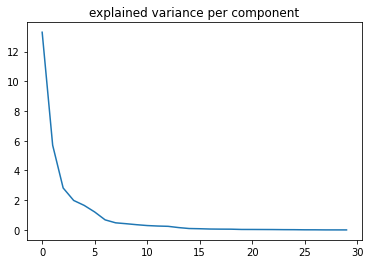

In [33]:
# make all principal components
# order them and plot the eigenvalues, explained variance,, per component
pca_all = PCA(n_components=30)
pca_all.fit(X_scaled)
pd.Series(pca_all.explained_variance_).plot(title='explained variance per component');

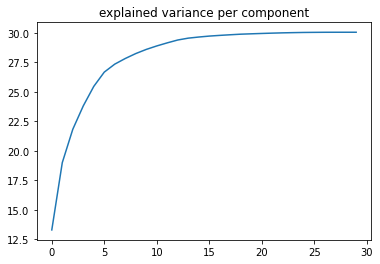

In [34]:
# cumulative plot
pd.Series(pca_all.explained_variance_).cumsum().plot(title='explained variance per component');

In [35]:
# check that scaling = Z-transformation: 0 mean, and unit std
print(X_scaled.mean(0))
print(X_scaled.std(0 ))

[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


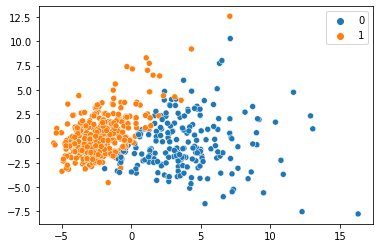

In [36]:
# Far more general alternative for the plot code in the book p147

import seaborn as sns

sns.scatterplot(x=X_pca[:, 0], y= X_pca[:, 1], hue = cancer.target);

In [29]:
# Via pandas

import pandas as pd

df= pd.DataFrame(X_pca)
df['target']= cancer.target
df.columns=['First PC', 'Second PC', 'Class']
df.head()

First PC  Second PC  Class
0  9.192837   1.948583      0
1  2.387802  -3.768172      0
2  5.733896  -1.075174      0
3  7.122953  10.275589      0
4  3.935302  -1.948072      0

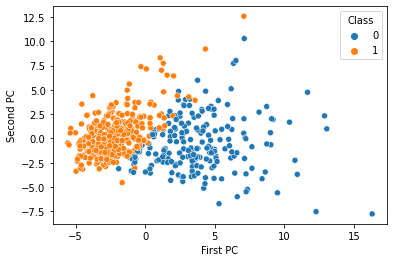

In [50]:
sns.scatterplot(x='First PC', y='Second PC', hue =  'Class', data=df);

In [49]:
#Even checken

df.Class.value_counts()

Class
1    357
0    212
Name: count, dtype: int64

# Wrap up

1. We hebben ML in 4 soorten opgedeeld
    1. Groeperen
    2. Classificeren
    3. Voorspellen
    4. Handelen 

2. In de gebruikelijke ML terminologie:
    1. Clustering
    2. Classification
    3. Regression
    4. Reinforcement learning

# Soort training

* *Unsupervised*
    1. Clustering
* *Supervised*
    2. Classification
    3. Regression
* *Uitproberen met feedback/reward*
    4. Reinforcement learning

# Vandaag

* Groeperen
    * Geen trainingsvoorbeelden nodig
    * Clustering, K-means, hierarchisch, DBSCAN
* PCA
* Boek Hfd 3.